# ИДЗ 3
## Ноздрин В.Я. гр. 9383

$\alpha_1=0.02\quad h=0.73$  

In [2]:
alpha1 = 0.02
h = 0.73

В качестве эксперимента была взята выборка cars из датасетов R. В ней описаны скорости автомобилей и длина тормозного пути.

In [3]:
library(matlib)
library(datasets)

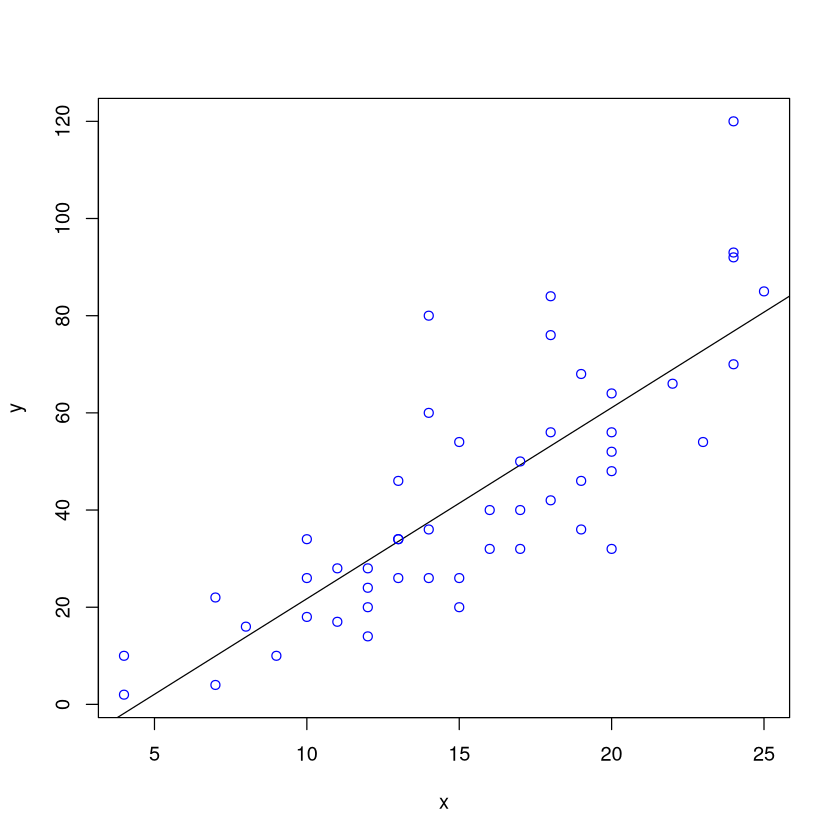

In [103]:
x = cars$speed
y = cars$dist
n = length(x)
plot(x, y,col = "blue", abline(lm(y~x)))

# 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.  
Графические результаты эксперимента

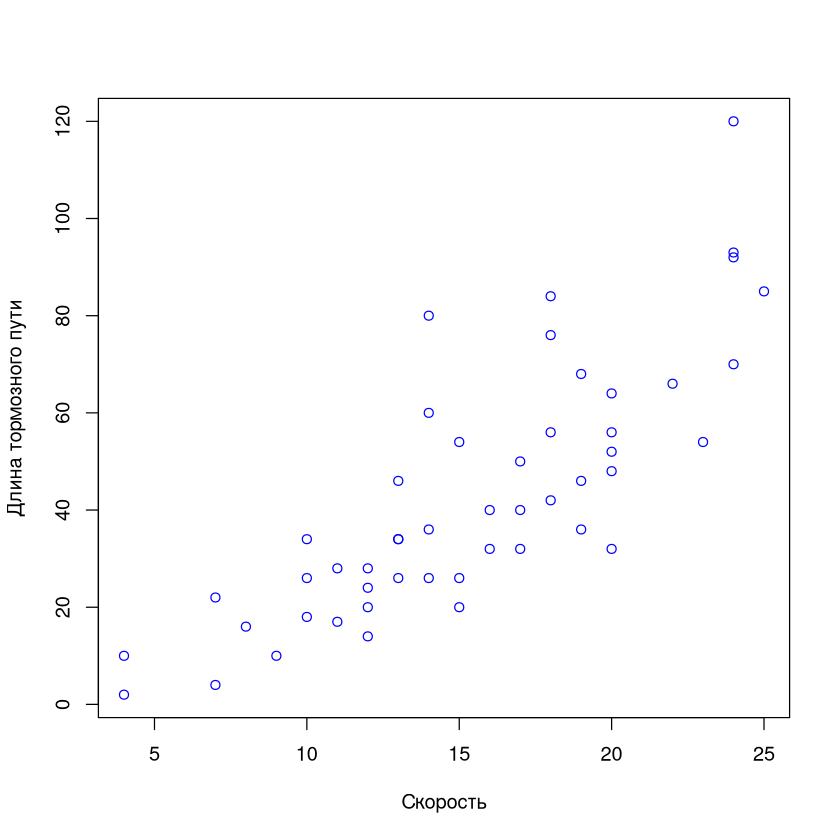

In [104]:
plot(x, y, col = "blue", xlab="Скорость", ylab="Длина тормозного пути")

${Y = \beta_0 + \beta_1 \cdot X + \varepsilon}$

${\widehat \beta_0 = \overline y - \widehat  \beta_1 \overline x}$

${\beta_1 = \frac{S_{xy}}{S_{xx}}}$

${S_{xy} = \sum{x_i  y_i} - \frac{1}{n} \sum{x_i}\sum{y_i}}$

${S_{xx} = \sum{x_i^2} - \frac{1}{n}( \sum{x_i})^2}$

In [108]:
Sxy = sum(x * y) - sum(x) * sum(y) / n
Sxx = sum(x ^ 2) - sum(x) ^ 2 / n

beta1 = Sxy / Sxx
beta0 = mean(y) - beta1 * mean(x)

cat("Бета 0 равна:", beta0, "\n")
cat("Бета 1 равна:", beta1, "\n")

Бета 0 равна: -17.57909 
Бета 1 равна: 3.932409 


Построим полученную линейную регрессию

In [109]:
regressionFunc = function(x) {
    return(beta0 + beta1 * x)
}

regressionFunc9 = function(x) {
    return(2.909 * x)
}

summary(lm(y~0+x,data))


Call:
lm(formula = y ~ 0 + x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.183 -12.637  -5.455   4.590  50.181 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   2.9091     0.1414   20.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.26 on 49 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942 
F-statistic: 423.5 on 1 and 49 DF,  p-value: < 2.2e-16


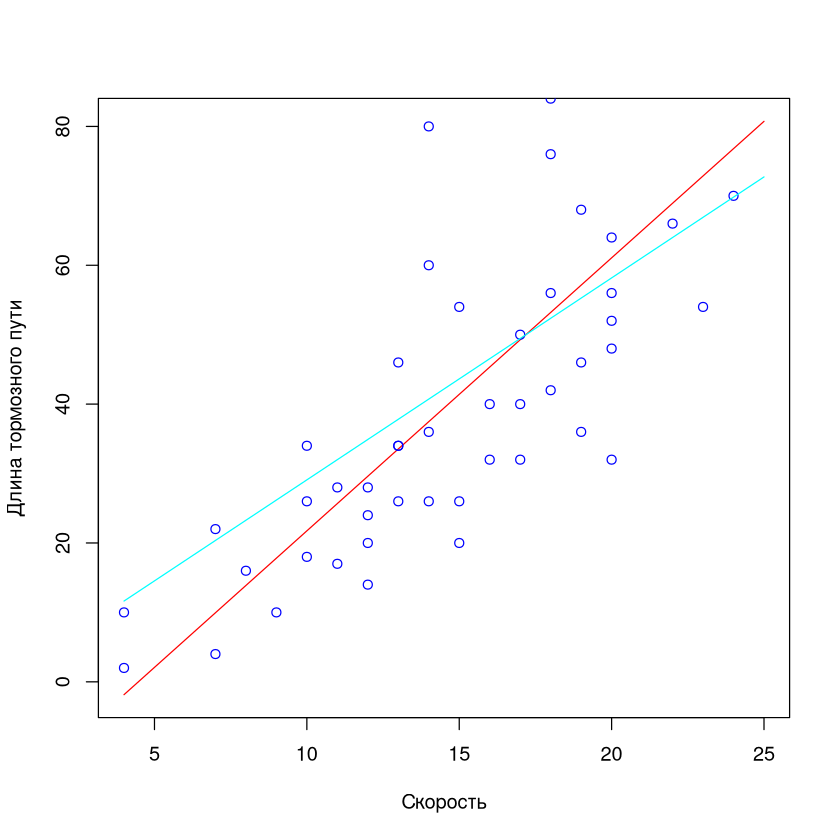

In [110]:
t = seq(min(x), max(x), by=1)
plot(t, regressionFunc(t), col='red', type='l', xlab="Скорость", ylab="Длина тормозного пути")
points(x, y, col="blue")
lines(t,regressionFunc9(t), col='cyan')

Как и ожидалось, визуально данный график похож на линейную регрессию

# 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне ${\alpha}$ по ${\chi^2}$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.  
${\varepsilon_i = y_i - \widehat \beta_0 - \widehat \beta_1 x_i}$

In [113]:
residualFunc = function(y, x) {
    return(y - regressionFunc(x))
}

residuals = residualFunc(y, x)
cat(residuals)
cat(sum(residuals))

3.84946 11.84946 -5.947766 12.05223 2.119825 -7.812584 -3.744993 4.255007 12.25501 -8.677401 2.322599 -15.60981 -9.60981 -5.60981 -1.60981 -7.542219 0.457781 0.457781 12.45778 -11.47463 -1.474628 22.52537 42.52537 -21.40704 -15.40704 12.59296 -13.33945 -5.339445 -17.27185 -9.271854 0.728146 -11.20426 2.795737 22.79574 30.79574 -21.13667 -11.13667 10.86333 -29.06908 -13.06908 -9.06908 -5.06908 2.93092 -2.933898 -18.86631 -6.798715 15.20128 16.20128 43.20128 4.2688761.776357e-13

Несмещенную оценку дисперсии найдем по формуле ${\widehat \sigma_{несмещщенная}^2 = \frac{\sum(\varepsilon_i - \overline \varepsilon)^2}{n - 1}}$

In [114]:
sigmaUnbiased = sum((residuals - mean(residuals)) ^ 2) / (n - 1)
cat("Несмещенная оценка дисперсии:", sigmaUnbiased, "\n")

Несмещенная оценка дисперсии: 231.7045 


Построим гистограмму ошибок с шагом $h=0.73$

In [118]:
breakpoints=seq(min(residuals), max(residuals), by=h)
breakpoints=c(breakpoints, max(residuals))
breakpoints

[1] -29.0690803 -28.3390803 -27.6090803 -26.8790803 -26.1490803 -25.4190803
  [7] -24.6890803 -23.9590803 -23.2290803 -22.4990803 -21.7690803 -21.0390803
 [13] -20.3090803 -19.5790803 -18.8490803 -18.1190803 -17.3890803 -16.6590803
 [19] -15.9290803 -15.1990803 -14.4690803 -13.7390803 -13.0090803 -12.2790803
 [25] -11.5490803 -10.8190803 -10.0890803  -9.3590803  -8.6290803  -7.8990803
 [31]  -7.1690803  -6.4390803  -5.7090803  -4.9790803  -4.2490803  -3.5190803
 [37]  -2.7890803  -2.0590803  -1.3290803  -0.5990803   0.1309197   0.8609197
 [43]   1.5909197   2.3209197   3.0509197   3.7809197   4.5109197   5.2409197
 [49]   5.9709197   6.7009197   7.4309197   8.1609197   8.8909197   9.6209197
 [55]  10.3509197  11.0809197  11.8109197  12.5409197  13.2709197  14.0009197
 [61]  14.7309197  15.4609197  16.1909197  16.9209197  17.6509197  18.3809197
 [67]  19.1109197  19.8409197  20.5709197  21.3009197  22.0309197  22.7609197
 [73]  23.4909197  24.2209197  24.9509197  25.6809197  26.4109197  27.1409197
 [79]  27.8709197  28.6009197  29.3309197  30.0609197  30.7909197  31.5209197
 [85]  32.2509197  32.9809197  33.7109197  34.4409197  35.1709197  35.9009197
 [91]  36.6309197  37.3609197  38.0909197  38.8209197  39.5509197  40.2809197
 [97]  41.0109197  41.7409197  42.4709197  43.2009197  43.2012847

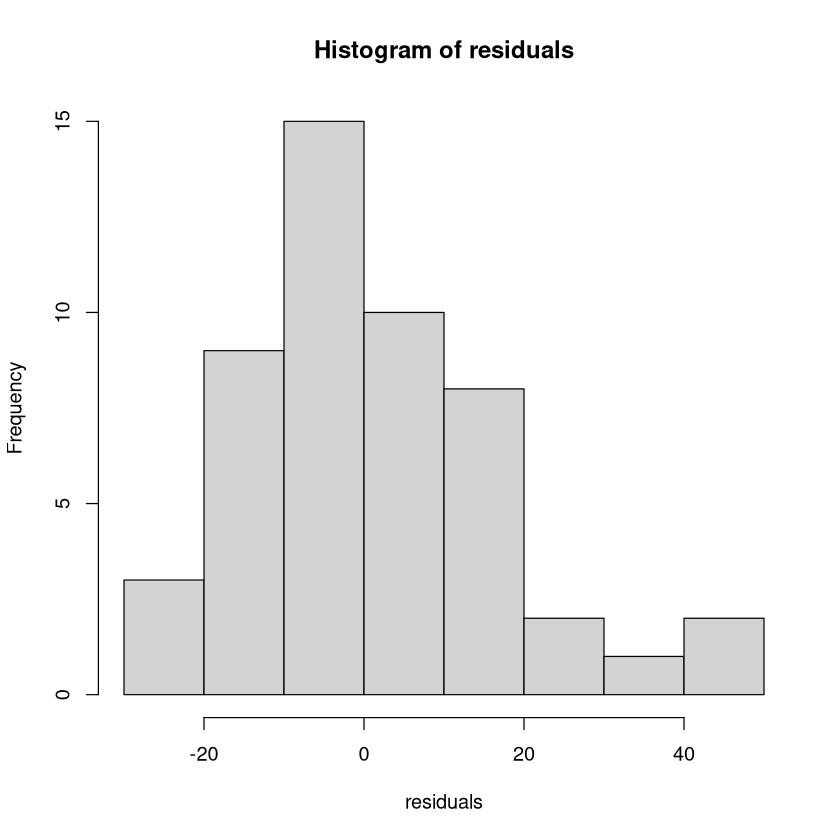

In [126]:
histogram=hist(residuals)

Проверим гипотезу нормальности ошибок ${H_0 : P \sim Norm(0, \widehat \sigma_{несмещенная}^2)}$ на уровне ${\alpha = \alpha_1 = 0.01}$ по ${\chi^2}$.

In [117]:
histogram$count

[1] 1 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 1 0 2 0 0 2 0 0 3 0 1 3 0 2 1 1 3 0 1 1 0
 [38] 2 0 0 3 0 1 3 0 3 0 0 0 0 0 0 0 0 1 0 4 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 [75] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

In [22]:
empir_freq = histogram$count
theor_prob = rep(0, length(empir_freq) - 1)

In [23]:
pFunc = function(x) {
    return(pnorm(x, mean=0, sd=sqrt(sigmaUnbiased)))
}

In [24]:
theor_prob[1] = pFunc(breakpoints[2])
for (i in 2:(length(breakpoints) - 1)) {
    theor_prob[i] = pFunc(breakpoints[i + 1]) - pFunc(breakpoints[i])
}
theor_prob[length(theor_prob)] = 1 - pFunc(breakpoints[length(breakpoints)])

In [25]:
real_theor_prob = c()
real_empir_freq = c()
theor_freq = c()
addToFirst = 0
addToFirstEmpir = 0
len = n

trigger = 3

if (theor_prob[1] * len > trigger) {
    real_theor_prob = c(real_theor_prob, theor_prob[1])
    real_empir_freq = c(real_empir_freq, empir_freq[1])
    theor_freq = c(theor_freq, theor_prob[1] * len)
} else {
    addToFirst = theor_prob[1]
    addToFirstEmpir = empir_freq[1]
}

for (i in 2:(length(theor_prob) - 1)) {
    if (theor_prob[i] * len > trigger) {
        real_theor_prob = c(real_theor_prob, theor_prob[i])
        real_empir_freq = c(real_empir_freq, empir_freq[i])
        theor_freq = c(theor_freq, theor_prob[i] * len)
    }
}

if (theor_prob[length(theor_prob)] * len > trigger) {
    real_theor_prob = c(real_theor_prob, theor_prob[length(theor_prob)])
    real_empir_freq = c(real_empir_freq, empir_freq[length(empir_freq)])
    theor_freq = c(theor_freq, theor_prob[length(theor_prob)] * len)
} else {
    real_theor_prob[length(real_theor_prob)] = real_theor_prob[length(real_theor_prob)] + theor_prob[length(theor_prob)]
    real_empir_freq[length(real_empir_freq)] = real_empir_freq[length(real_empir_freq)] + empir_freq[length(empir_freq)]
    theor_freq[length(theor_freq)] = theor_freq[length(theor_freq)] + theor_prob[length(theor_prob)] * len
}

real_theor_prob[1] = real_theor_prob[1] + addToFirst
real_empir_freq[1] = real_empir_freq[1] + addToFirstEmpir
theor_freq[1] = theor_freq[1] + addToFirst * len

theor_prob = real_theor_prob
empir_freq = real_empir_freq

Построим критерий значимости ${\chi^2}$ на основе эмпирических и теоретических частот. ${\chi^2 = \sum_{j=1}^N \frac{(\nu_j -th_j)}{th_j}}$, где ${\nu_j}$ - эмпирическое значение, а ${th_j}$ - теоретическое

In [26]:
chisq = (empir_freq - theor_freq)^2
chisq = chisq / theor_freq
chisq = sum(chisq)
cat("Критерий значимости хи квадрат:", chisq)

Критерий значимости хи квадрат: 0

In [27]:
chisq_a1_lower = qchisq(alpha1 / 2, df=(length(empir_freq) - 1))
chisq_a1_upper = qchisq(1 - alpha1 / 2, df=(length(empir_freq) - 1))
cat("Интервал критерия значимости на уровне значимости", alpha1, "[",
    chisq_a1_lower, ",", chisq_a1_upper, "]")

Warning message in qchisq(alpha1/2, df = (length(empir_freq) - 1)):
“NaNs produced”
Warning message in qchisq(1 - alpha1/2, df = (length(empir_freq) - 1)):
“NaNs produced”


Интервал критерия значимости на уровне значимости 0.02 [ NaN , NaN ]

In [28]:
if (chisq >= chisq_a1_lower & chisq <= chisq_a1_upper) {
    cat("Нет оснований отвергнуть гипотезу H_0 на уровне значимости alpha=", alpha1, "\n")
} else {
    cat("Отвергаем гипотезу H_0 на уровне значимости alpha=", alpha1, "\n")
}

ERROR: Error in if (chisq >= chisq_a1_lower & chisq <= chisq_a1_upper) {: missing value where TRUE/FALSE needed


Проверим, что ошибки действительно из нормального распределения

In [29]:
ks.test(residuals,"pnorm",mean=0,sd=sqrt(sigmaUnbiased))

Warning message in ks.test(residuals, "pnorm", mean = 0, sd = sqrt(sigmaUnbiased)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  residuals
D = 0.12957, p-value = 0.3708
alternative hypothesis: two-sided


Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

In [30]:
ks = ks.test(residuals,"pnorm", mean=mean(residuals), sd=sd(residuals))
cat("Расстояние до класса нормальных распределений по Колмогорову", ks$statistic/sqrt(n), "\n")

Warning message in ks.test(residuals, "pnorm", mean = mean(residuals), sd = sd(residuals)):
“ties should not be present for the Kolmogorov-Smirnov test”


Расстояние до класса нормальных распределений по Колмогорову 0.01832374 


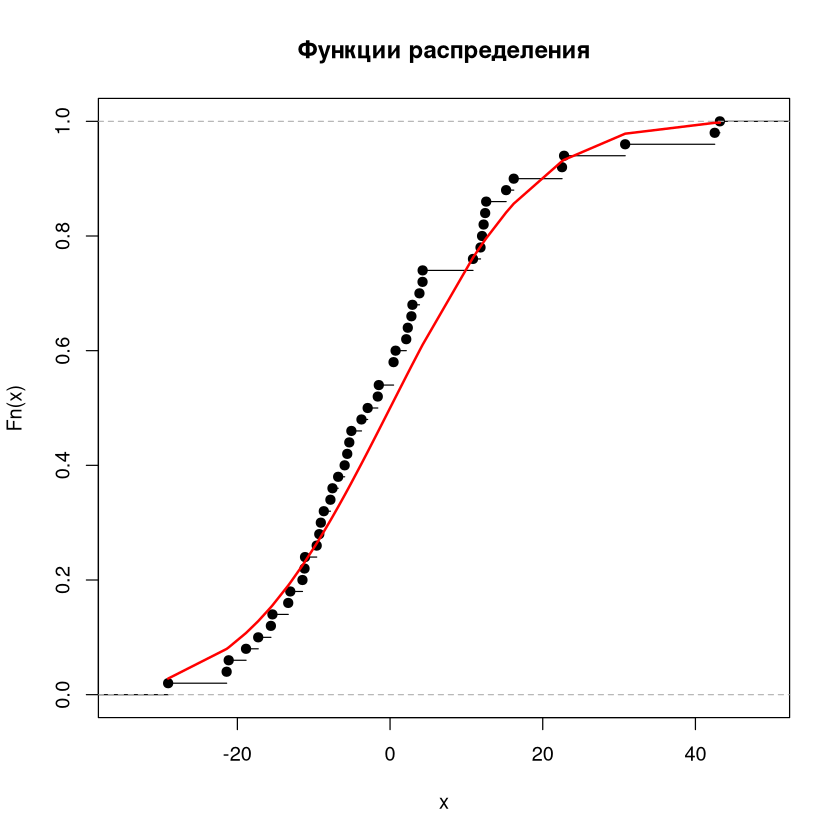

In [31]:
plot(ecdf(residuals), main = "Функции распределения")
points(sort(residuals), pnorm(sort(residuals), mean=mean(residuals), sd=sd(residuals)), type="l", col="red", lwd=2)

# 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия ${1 - \alpha}$.

${\beta_0}$ - сдвиг, ${\beta_1}$ - масштаб

Доверительные интервалы для ${\beta_0}$ будет выглядеть следующим образом

${\beta_0 \in [\widehat \beta_0 - t_{n-2, 1 - \frac{\alpha}{2}} \cdot \sqrt{MSE \cdot (\frac{1}{n} + \frac{\overline x^2}{S_{xx}})};\widehat \beta_0 + t_{n-2, 1 - \frac{\alpha}{2}} \cdot \sqrt{MSE \cdot (\frac{1}{n} + \frac{\overline x^2}{S_{xx}})}]}$

${MSE = \frac{SSE}{n-2}}$

${SSE = \sum (y_i - \widehat \beta_0 - \widehat \beta_1 x_i)^2}$

In [32]:
SSE = sum((residualFunc(y, x)) ^ 2)

In [33]:
MSE = SSE / (n - 2)

In [34]:
lowerBoundBeta0 = beta0 - qt(1 - alpha1 / 2, df=(n - 2)) *
    sqrt(MSE * (1/n + mean(x) ^ 2 / Sxx))
cat("Нижняя граница ДИ бета 0:", lowerBoundBeta0, "\n")

Нижняя граница ДИ бета 0: -33.84383 


In [35]:
upperBoundBeta0 = beta0 + qt(1 - alpha1 / 2, df=(n - 2)) *
    sqrt(MSE * (1/n + mean(x) ^ 2 / Sxx))
cat("Верхняя граница ДИ бета 0:", upperBoundBeta0, "\n")

Верхняя граница ДИ бета 0: -1.314359 


In [36]:
cat("ДИ для бета 0: [", lowerBoundBeta0, ", ", upperBoundBeta0, "]\n")
cat("Значение бета 0:", beta0, "\n")

ДИ для бета 0: [ -33.84383 ,  -1.314359 ]
Значение бета 0: -17.57909 


Доверительный интервал для ${\beta_1}$ будет выглядеть следующим образом

${\beta_1 \in [\widehat \beta_1 - t_{n-2, 1 - \frac{\alpha}{2}} \cdot \sqrt{var \widehat \beta_1};\widehat \beta_1 + t_{n-2, 1 - \frac{\alpha}{2}} \cdot \sqrt{var \widehat \beta_1}]}$

${var \widehat \beta_1 = \frac{\frac{1}{n-2} \cdot SSE}{\sum{(x_i - \overline x)^2}}}$

In [37]:
varBeta1 = (SSE / (n - 2))/(sum((x - mean(x)) ^ 2))

In [38]:
lowerBoundBeta1 = beta1 - qt(1 - alpha1 / 2, df=(n - 2)) *
    sqrt(varBeta1)
cat("Нижняя граница ДИ бета 1:", lowerBoundBeta1, "\n")

Нижняя граница ДИ бета 1: 2.932443 


In [39]:
upperBoundBeta1 = beta1 + qt(1 - alpha1 / 2, df=(n - 2)) *
    sqrt(varBeta1)
cat("Верхняя граница ДИ бета 1:", upperBoundBeta1, "\n")

Верхняя граница ДИ бета 1: 4.932374 


In [40]:
cat("ДИ для бета 1: [", lowerBoundBeta1, ", ", upperBoundBeta1, "]\n")
cat("Значение бета 1:", beta1, "\n")

ДИ для бета 1: [ 2.932443 ,  4.932374 ]
Значение бета 1: 3.932409 


# 4. Сформулировать гипотезу независимости переменной ${Y}$ от переменной ${X}$. Провести проверку значимости.

Гипотеза об отсутствии зависимости - ${H_0 : \exists i : \beta_i = 0}$

**t-критерий**: ${T_j = \frac{\widehat \beta_j}{\widehat \sigma^2 \cdot ((XX^T)^{-1})_{j,j}}}$

Если ${\left | T_j \right | \geq t_{n - 2, 1 - \frac{\alpha}{2}}}$, то ${H_0}$ отвергается для ${\beta_j}$

In [41]:
I = rep(1, n)

In [42]:
X=matrix(c(I, x), nrow=n, ncol=2)

In [43]:
XX = t(X) %*% X

In [44]:
inverseXX = inv(XX)

In [45]:
tBeta0 = beta0 / (sqrt(sigmaUnbiased * inverseXX[1, 1]))
tBeta1 = beta1 / (sqrt(sigmaUnbiased * inverseXX[2, 2]))
tBeta0
tBeta1

[1] -2.628013

[1] 9.562045

In [46]:
quantileT = qt(1 - alpha1 / 2, df=(n-2))
quantileT

[1] 2.406581

In [47]:
if (abs(tBeta0) >= quantileT) {
    cat("H_0 отвергается - значит бета 0 объясняет регрессионную зависимость Y от X")
} else {
    cat("H_0 принимается - значит бета 0 не влияет на зависимость Y от X")
}

H_0 отвергается - значит бета 0 объясняет регрессионную зависимость Y от X

In [48]:
if (abs(tBeta1) >= quantileT) {
    cat("H_0 отвергается - значит бета 1 объясняет регрессионную зависимость Y от X")
} else {
    cat("H_0 принимается - значит бета 1 не влияет на зависимость Y от X")
}

H_0 отвергается - значит бета 1 объясняет регрессионную зависимость Y от X

In [49]:
data = data.frame(y = y, x1 = x)
fit = lm(y ~ x1, data)

In [50]:
summary(fit)


Call:
lm(formula = y ~ x1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
x1            3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


Последний столбец Pr(>|t|) в выводе выше подтверждает наши сделанные вручную выводы - коэффициент бета 0 не влияет на зависимость, а бета 1 влияет. Так как p-value для x1 очень мало, то мы можем отвергнуть гипотезу о независимости почти на любом уровне значимости.

# 5. Сформулировать модель, включающую дополнительный член с ${X^2}$. Построить МНК оценки параметров ${\beta_0}$, ${\beta_1}$, ${\beta_2}$ в данной модели. Изобразить графически полученную регрессионную зависимость.

${Y = \beta_0 + \beta_1 \cdot X + \beta_2 \cdot X^2 + \varepsilon}$

In [51]:
I2 = rep(1, n)

In [52]:
X2 = matrix(c(I, x, x ^ 2), nrow=n, ncol=3)

In [53]:
XX2 = t(X2) %*% X2

In [54]:
inverseXX2 = inv(XX2)

In [55]:
coefs2 = inverseXX2 %*% t(X2) %*% y

In [56]:
coefs2

2.4711076
0.9132991
0.1035319


In [57]:
beta20 = coefs2[1]
beta21 = coefs2[2]
beta22 = coefs2[3]

In [58]:
regression2Func = function(x) {
    return(beta20 + beta21 * x + beta22 * (x ^ 2))
}

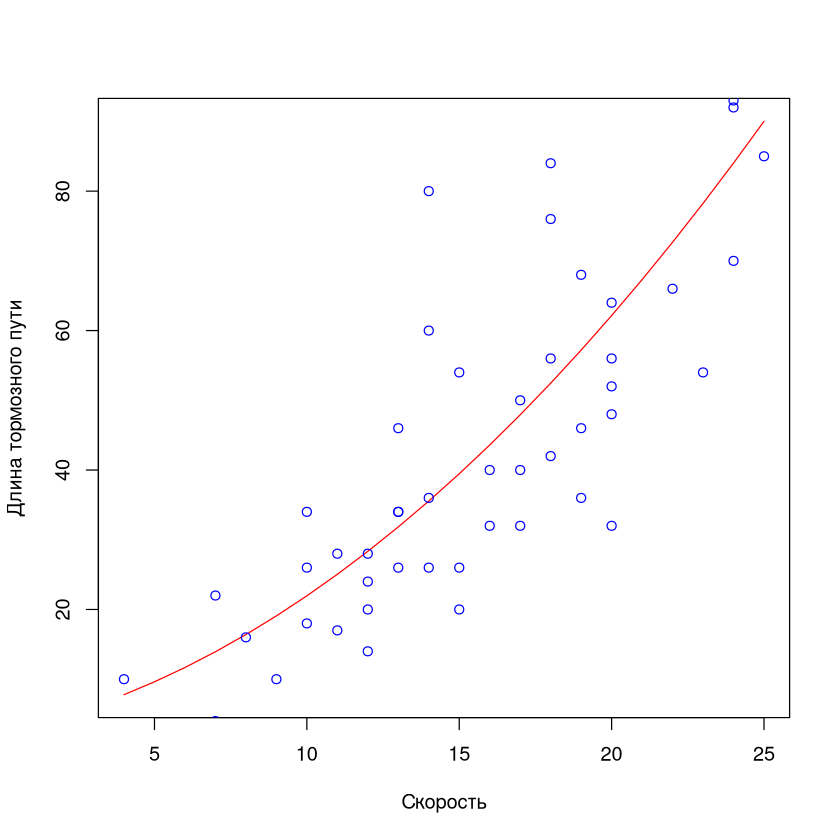

In [59]:
t2 = seq(min(x), max(x), by=1)
plot(t2, regression2Func(t2), col='red', type='l', 
     xlab="Скорость", ylab="Длина тормозного пути")
points(x, y, col="blue")

Для проверки полученных коэффициентов можем использовать функцию lm()

In [60]:
data2 = data.frame(y = y, x1 = x, x2 = x ^ 2)
fit2 = lm(y ~ x1 + x2, data2)
summary(fit2)


Call:
lm(formula = y ~ x1 + x2, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
x1           0.91329    2.03422   0.449    0.656
x2           0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


# 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в п.2.

In [61]:
residual2Func = function(y, x) {
    return(y - regression2Func(x))
}

In [62]:
residuals2 = residual2Func(y, x)

In [63]:
residuals2
sum(residuals2)

[1]  -5.7808149   2.2191851  -9.9372656   8.0627344  -0.4035435  -9.0768853
 [7]  -3.9572909   4.0427091  12.0427091  -8.0447604   2.9552396 -14.3392937
[13]  -8.3392937  -4.3392937  -0.3392937  -5.8408908   2.1591092   2.1591092
[19]  14.1591092  -9.5495518   0.4504482  24.4504482  44.4504482 -19.4652766
[25] -13.4652766  14.5347234 -11.5880652  -3.5880652 -15.9179177  -7.9179177
[31]   2.0820823 -10.4548340   3.5451660  23.5451660  31.5451660 -21.1988142
[37] -11.1988142  10.8011858 -30.1498582 -14.1498582 -10.1498582  -6.1498582
[43]   1.8501418  -6.6731378 -24.2453733 -14.0246727   7.9753273   8.9753273
[49]  35.9753273  -5.0110359

[1] -47.31595

Несмещенную оценку дисперсии найдем по формуле ${\widehat \sigma_{несмещщенная}^2 = \frac{\sum(\varepsilon_i - \overline \varepsilon)^2}{n - 1}}$

In [64]:
sigmaUnbiased2 = sum((residuals2 - mean(residuals2)) ^ 2) / (n - 1)

In [65]:
cat("Несмещенная оценка дисперсии:", sigmaUnbiased2, "\n")

Несмещенная оценка дисперсии: 221.252 


Построим гистограмму ошибок с шагом ${h=2.80}$

In [66]:
breakpoints2 = seq(min(residuals2), max(residuals2), by=h)
breakpoints2 = c(breakpoints2, max(residuals2))

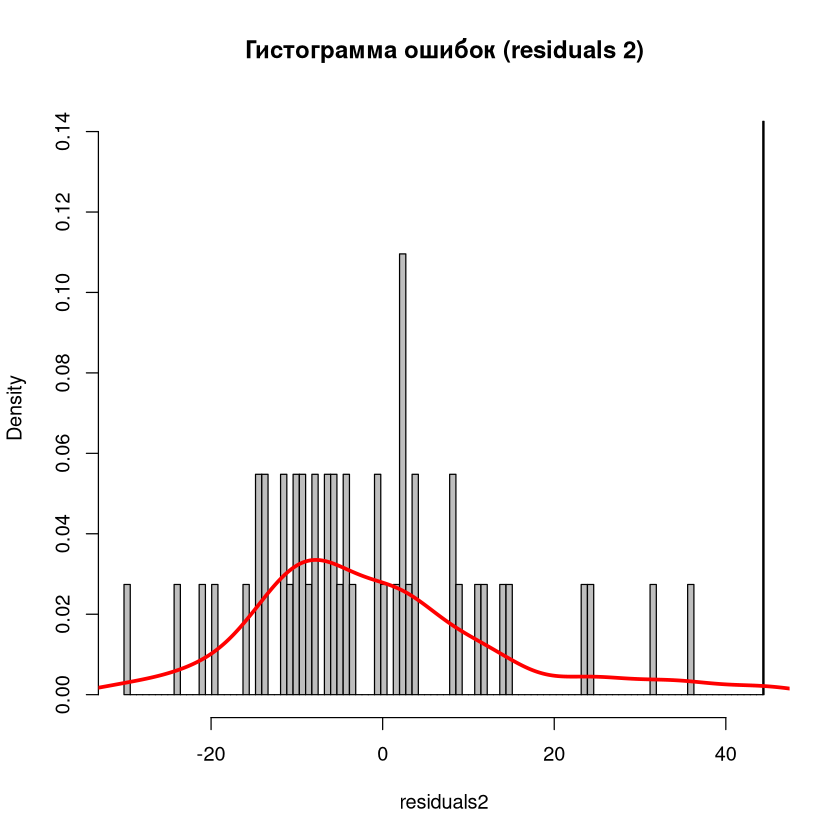

In [67]:
histogram2=hist(residuals2, breaks=breakpoints2, freq = F, col='grey', main = "Гистограмма ошибок (residuals 2)")
lines(density(residuals2), col="red", lwd=3)

Проверим гипотезу нормальности ошибок ${H_0 : P \sim Norm(0, \widehat \sigma_{несмещенная}^2)}$ на уровне ${\alpha = \alpha_1 = 0.01}$ по ${\chi^2}$.

In [68]:
histogram2$count

[1] 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 2 0 0 2 1 2 2 1 2 0 2 2 1 2 1
 [38] 0 0 0 2 1 0 1 4 1 2 0 0 0 0 0 2 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1

In [69]:
empir_freq2 = histogram2$count
theor_prob2 = rep(0, length(empir_freq2) - 1)

In [70]:
pFunc2 = function(x) {
    return(pnorm(x, mean=0, sd=sqrt(sigmaUnbiased2)))
}

In [71]:
theor_prob2[1] = pFunc2(breakpoints2[2])
for (i in 2:(length(breakpoints2) - 1)) {
    theor_prob2[i] = pFunc2(breakpoints2[i + 1]) - pFunc2(breakpoints2[i])
}
theor_prob2[length(theor_prob2)] = 1 - pFunc2(breakpoints2[length(breakpoints2)])

In [72]:
real_theor_prob2 = c()
real_empir_freq2 = c()
theor_freq2 = c()
addToFirst2 = 0
addToFirstEmpir2 = 0
len2 = n

trigger2 = 3

if (theor_prob2[1] * len2 > trigger2) {
    real_theor_prob2 = c(real_theor_prob2, theor_prob2[1])
    real_empir_freq2 = c(real_empir_freq2, empir_freq2[1])
    theor_freq2 = c(theor_freq2, theor_prob2[1] * len2)
} else {
    addToFirst2 = theor_prob2[1]
    addToFirstEmpir2 = empir_freq2[1]
}

for (i in 2:(length(theor_prob2) - 1)) {
    if (theor_prob2[i] * len2 > trigger2) {
        real_theor_prob2 = c(real_theor_prob2, theor_prob2[i])
        real_empir_freq2 = c(real_empir_freq2, empir_freq2[i])
        theor_freq2 = c(theor_freq2, theor_prob2[i] * len2)
    }
}

if (theor_prob2[length(theor_prob2)] * len2 > trigger2) {
    real_theor_prob2 = c(real_theor_prob2, theor_prob2[length(theor_prob2)])
    real_empir_freq2 = c(real_empir_freq2, empir_freq2[length(empir_freq2)])
    theor_freq2 = c(theor_freq2, theor_prob2[length(theor_prob2)] * len2)
} else {
    real_theor_prob2[length(real_theor_prob2)] = real_theor_prob2[length(real_theor_prob2)] + theor_prob2[length(theor_prob2)]
    real_empir_freq2[length(real_empir_freq2)] = real_empir_freq2[length(real_empir_freq2)] + empir_freq2[length(empir_freq2)]
    theor_freq2[length(theor_freq2)] = theor_freq2[length(theor_freq2)] + theor_prob2[length(theor_prob2)] * len2
}

real_theor_prob2[1] = real_theor_prob2[1] + addToFirst2
real_empir_freq2[1] = real_empir_freq2[1] + addToFirstEmpir2
theor_freq2[1] = theor_freq2[1] + addToFirst2 * len2

theor_prob2 = real_theor_prob2
empir_freq2 = real_empir_freq2

Построим критерий значимости ${\chi^2}$ на основе эмпирических и теоретических частот. ${\chi^2 = \sum_{j=1}^N \frac{(\nu_j -th_j)}{th_j}}$, где ${\nu_j}$ - эмпирическое значение, а ${th_j}$ - теоретическое

In [73]:
chisq2 = (empir_freq2 - theor_freq2)^2
chisq2 = chisq2 / theor_freq2
chisq2 = sum(chisq2)
cat("Критерий значимости хи квадрат:", chisq2)

Критерий значимости хи квадрат: 0

In [74]:
chisq_a1_lower2 = qchisq(alpha1 / 2, df=(length(empir_freq2) - 1))
chisq_a1_upper2 = qchisq(1 - alpha1 / 2, df=(length(empir_freq2) - 1))
cat("Интервал критерия значимости на уровне значимости", alpha1, "[",
    chisq_a1_lower2, ",", chisq_a1_upper2, "]")

Warning message in qchisq(alpha1/2, df = (length(empir_freq2) - 1)):
“NaNs produced”
Warning message in qchisq(1 - alpha1/2, df = (length(empir_freq2) - 1)):
“NaNs produced”


Интервал критерия значимости на уровне значимости 0.02 [ NaN , NaN ]

In [75]:
if (chisq2 >= chisq_a1_lower2 & chisq2 <= chisq_a1_upper2) {
    cat("Нет оснований отвергнуть гипотезу H_0 на уровне значимости alpha=", alpha1, "\n")
} else {
    cat("Отвергаем гипотезу H_0 на уровне значимости alpha=", alpha1, "\n")
}

ERROR: Error in if (chisq2 >= chisq_a1_lower2 & chisq2 <= chisq_a1_upper2) {: missing value where TRUE/FALSE needed


Проверим, что ошибки действительно из нормального распределения

In [76]:
ks.test(residuals2,"pnorm",mean=0,sd=sqrt(sigmaUnbiased2))

Warning message in ks.test(residuals2, "pnorm", mean = 0, sd = sqrt(sigmaUnbiased2)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  residuals2
D = 0.15289, p-value = 0.1929
alternative hypothesis: two-sided


Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

In [77]:
ks2 = ks.test(residuals2,"pnorm", mean=mean(residuals2), sd=sd(residuals2))
cat("Расстояние до класса нормальных распределений по Колмогорову", ks2$statistic/sqrt(n), "\n")

Warning message in ks.test(residuals2, "pnorm", mean = mean(residuals2), sd = sd(residuals2)):
“ties should not be present for the Kolmogorov-Smirnov test”


Расстояние до класса нормальных распределений по Колмогорову 0.01819513 


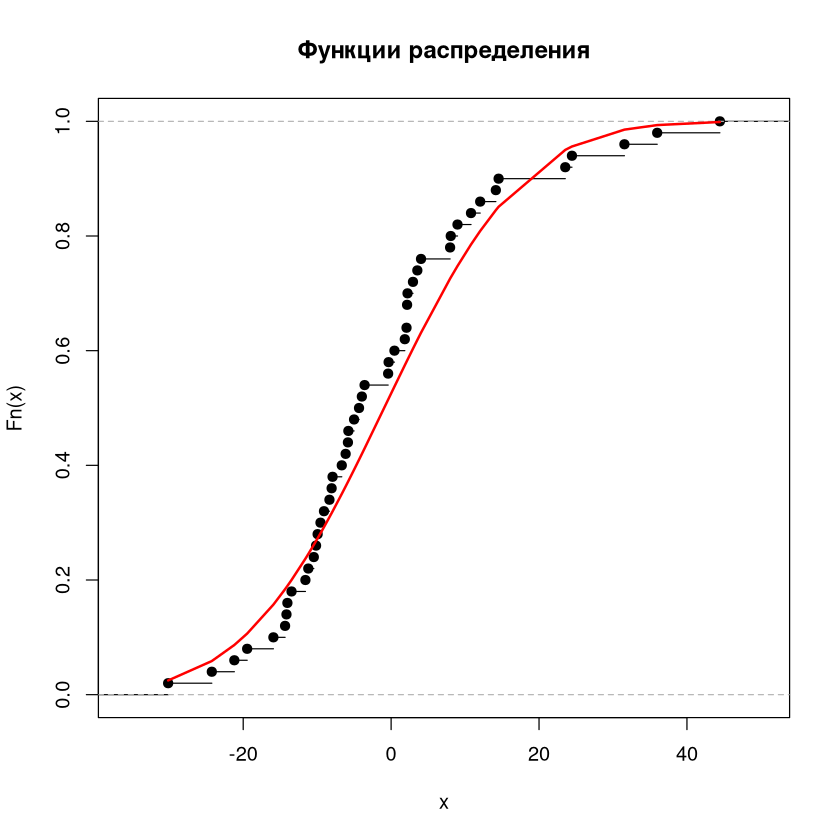

In [78]:
plot(ecdf(residuals2), main = "Функции распределения")
points(sort(residuals2), pnorm(sort(residuals2), mean=mean(residuals2), sd=sd(residuals2)), type="l", col="red", lwd=2)

# 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня ${1 - \alpha}$

In [79]:
tValues = summary(fit2)$coefficients[, "t value"]
tValueBeta20 = tValues[1]
tValueBeta21 = tValues[2]
tValueBeta22 = tValues[3]

Для ${\beta_{20}}$:

In [80]:
lowerBoundBeta20 = beta20 - qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta20
cat("Нижняя граница ДИ бета 20:", lowerBoundBeta20, "\n")

Нижняя граница ДИ бета 20: 2.069618 


In [81]:
upperBoundBeta20 = beta20 + qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta20
cat("Верхняя граница ДИ бета 20:", upperBoundBeta20, "\n")

Верхняя граница ДИ бета 20: 2.872598 


In [82]:
cat("ДИ для бета 20: [", lowerBoundBeta20, ", ", upperBoundBeta20, "]\n")
cat("Значение бета 20:", beta20, "\n")

ДИ для бета 20: [ 2.069618 ,  2.872598 ]
Значение бета 20: 2.471108 


Для ${\beta_{21}}$:

In [83]:
lowerBoundBeta21 = beta21 - qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta21
cat("Нижняя граница ДИ бета 21:", lowerBoundBeta21, "\n")

Нижняя граница ДИ бета 21: -0.1679562 


In [84]:
upperBoundBeta21 = beta21 + qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta21
cat("Верхняя граница ДИ бета 21:", upperBoundBeta21, "\n")

Верхняя граница ДИ бета 21: 1.994554 


In [85]:
cat("ДИ для бета 21: [", lowerBoundBeta21, ", ", upperBoundBeta21, "]\n")
cat("Значение бета 21:", beta21, "\n")

ДИ для бета 21: [ -0.1679562 ,  1.994554 ]
Значение бета 21: 0.9132991 


Для ${\beta_{22}}$:

In [86]:
lowerBoundBeta22 = beta22 - qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta22
cat("Нижняя граница ДИ бета 22:", lowerBoundBeta22, "\n")

Нижняя граница ДИ бета 22: -3.545748 


In [87]:
upperBoundBeta22 = beta22 + qt(1 - alpha1 / 2, df=(n - 3)) * tValueBeta22
cat("Верхняя граница ДИ бета 22:", upperBoundBeta22, "\n")

Верхняя граница ДИ бета 22: 3.752812 


In [88]:
cat("ДИ для бета 22: [", lowerBoundBeta22, ", ", upperBoundBeta22, "]\n")
cat("Значение бета 22:", beta22, "\n")

ДИ для бета 22: [ -3.545748 ,  3.752812 ]
Значение бета 22: 0.1035319 


# 8.  Сформулировать гипотезу линейной регрессионной независимости переменной ${Y}$ от переменной ${X}$ и проверить ее значимость на уровне ${1 - \alpha}$.

In [89]:
tBeta20 = beta20 / (sigmaUnbiased2 * inverseXX2[1, 1])
tBeta21 = beta21 / (sigmaUnbiased2 * inverseXX2[2, 2])
tBeta22 = beta22 / (sigmaUnbiased2 * inverseXX2[3, 3])

In [90]:
quantileT2 = qt(1 - alpha1 / 2, df=(n-3))

In [100]:
cat(
    ifelse(abs(tBeta20) >= quantileT2,
           "H_0 отвергается - значит бета 20 объясняет регрессионную зависимость Y от X",
           "H_0 принимается - значит бета 20 не влияет на зависимость Y от X")
)

H_0 принимается - значит бета 20 не влияет на зависимость Y от X

In [96]:
cat(
    ifelse(abs(tBeta21) >= quantileT2,
           "H_0 отвергается - значит бета 21 объясняет регрессионную зависимость Y от X",
           "H_0 принимается - значит бета 21 не влияет на зависимость Y от X")
)

H_0 принимается - значит бета 21 не влияет на зависимость Y от X

In [97]:
cat(
    ifelse(abs(tBeta22) >= quantileT2,
           "H_0 отвергается - значит бета 22 объясняет регрессионную зависимость Y от X",
           "H_0 принимается - значит бета 22 не влияет на зависимость Y от X")
)

H_0 отвергается - значит бета 22 объясняет регрессионную зависимость Y от X

In [98]:
summary(fit2)


Call:
lm(formula = y ~ x1 + x2, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
x1           0.91329    2.03422   0.449    0.656
x2           0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


Исходя из полученных результатов, а точнее из значения F-статистики, можно сказать, что выборка имеет квадратичную зависимость.

In [95]:
n=100
smp=rnorm(n)
ks.test(smp,"pnorm",mean=0,sd=1)


	One-sample Kolmogorov-Smirnov test

data:  smp
D = 0.062215, p-value = 0.8337
alternative hypothesis: two-sided
